In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("spam.csv",encoding='latin')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.describe().transpose()

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30


In [8]:
# Total Duplicate Value
df.duplicated().sum()

403

In [9]:
# Remove duplicate
df = df.drop_duplicates(keep='first')

In [10]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
# Column Rename
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [12]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
df.groupby('label').describe().transpose()

label                                                      ham  \
text count                                                4516   
     unique                                               4516   
     top     Go until jurong point, crazy.. Available only ...   
     freq                                                    1   

label                                                     spam  
text count                                                 653  
     unique                                                653  
     top     Free entry in 2 a wkly comp to win FA Cup fina...  
     freq                                                    1

In [14]:
# How many spam and ham

df.label.value_counts()

ham     4516
spam     653
Name: label, dtype: int64

In [15]:
plot_df = df.label.value_counts()

In [16]:
plot_df

ham     4516
spam     653
Name: label, dtype: int64

In [17]:
colors = ['g','r']

In [18]:
exp = [0,0.2]

<Axes: ylabel='label'>

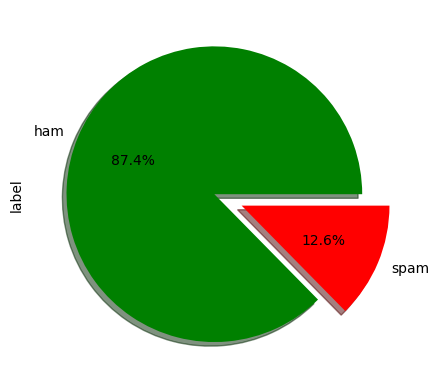

In [19]:
# Pie plot 
plot_df.plot(kind='pie',shadow=True,explode=exp,colors=colors,autopct='%1.1f%%')

In [20]:
# Converting categorical columns into numerics

df.loc[df['label']=='spam','label']=1
df.loc[df['label']=='ham','label']=0

In [21]:
df

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


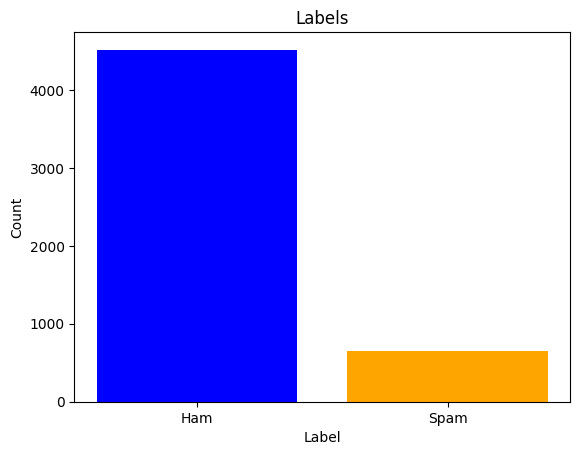

In [22]:
# 'Ham', 'Spam' Lables Bar plot
label_counts = df['label'].value_counts()
plt.bar(label_counts.index, label_counts.values, color=['blue', 'orange'])
plt.xticks([0, 1], ['Ham', 'Spam'])  # Set the x-axis labels
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Labels')
plt.show()

In [23]:
 # Imbalanced Dataset
from sklearn.utils import resample

In [24]:
df_largest = df[df['label']==0]
df_smallest = df[df['label']==1]

In [25]:
# Resampling with replacements

df_smallest_unsampled = resample(df_smallest,replace=True,n_samples=4825,random_state=0)

In [26]:
df_smallest_unsampled

,label,text
4656,1,PRIVATE! Your 2003 Account Statement for shows...
5364,1,Call 09095350301 and send our girls into eroti...
1373,1,"Bears Pic Nick, and Tom, Pete and ... Dick. In..."
2802,1,FreeMsg>FAV XMAS TONES!Reply REAL
42,1,07732584351 - Rodger Burns - MSG = We tried to...
...,...,...
659,1,88800 and 89034 are premium phone services cal...
419,1,Send a logo 2 ur lover - 2 names joined by a h...
3696,1,You are a winner you have been specially selec...
1068,1,Someone U know has asked our dating service 2 ...


In [27]:
df = pd.concat([df_largest,df_smallest_unsampled])

In [28]:
df.label.value_counts()

1    4825
0    4516
Name: label, dtype: int64

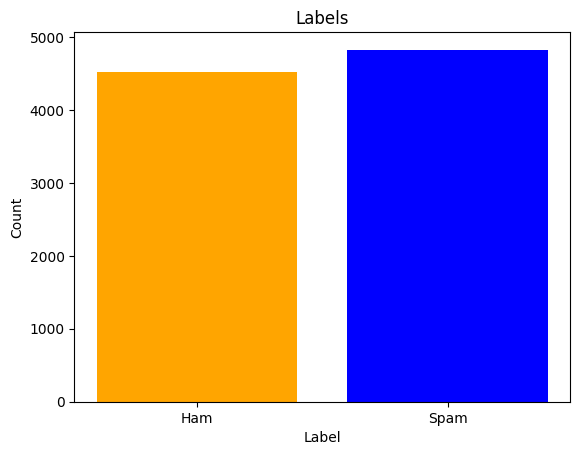

In [29]:
# After  Resampling with replacements 'Ham', 'Spam' Lables Bar plot
label_counts = df['label'].value_counts()
plt.bar(label_counts.index, label_counts.values, color=['blue', 'orange'])
plt.xticks([0, 1], ['Ham', 'Spam'])  # Set the x-axis labels
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Labels')
plt.show()

In [30]:
# Create Dependent and Independent Variables

x = df.text
y = df.label

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Split data according to test and train

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

# Vectorizaton

- Word Vectorization is a methodology in NLP to map words or phrases from vocabulary to a corrosponding vector of real numbers which i sused to find word predictions, word similarity/semantics.

- The process of converting words into numbers are called Vectorization. TF- IDF (Term Frequednct - Inverse Document Frequenct)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [34]:
vect = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

In [35]:
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [36]:
y_test.dtype

dtype('O')

In [37]:
# Label columns is in object type we need to change them to integer

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [38]:
# Model Building

from sklearn.naive_bayes import MultinomialNB

In [39]:
model  = MultinomialNB()

In [40]:
model.fit(x_train_vect,y_train)

MultinomialNB()

In [41]:
# Predictions and Accuracies

pred = model.predict(x_test_vect)

In [42]:
pred

array([1, 0, 1, ..., 0, 1, 1])

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test,pred)

0.9775280898876404

In [45]:
# Visualization through WordCloud

from wordcloud import WordCloud

In [46]:
wc = WordCloud(background_color='white', max_words=50,width = 950,height = 400).generate(''.join(df_largest.text))

(-0.5, 949.5, 399.5, -0.5)

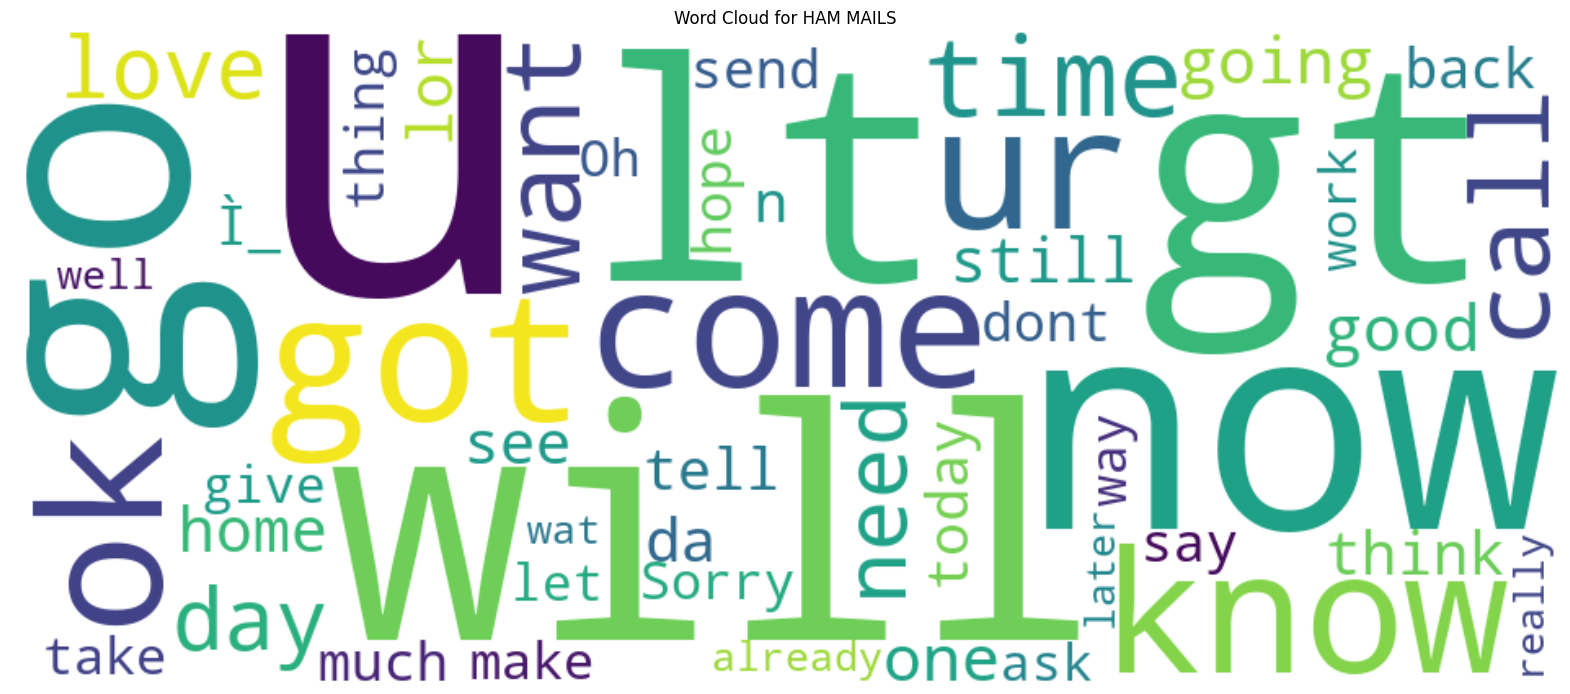

In [47]:
plt.figure(figsize=(20,10))
plt.title('Word Cloud for HAM MAILS')
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')

In [48]:
wc = WordCloud(background_color='black', max_words=50,width = 950,height = 400).generate(''.join(df_smallest.text))

(-0.5, 949.5, 399.5, -0.5)

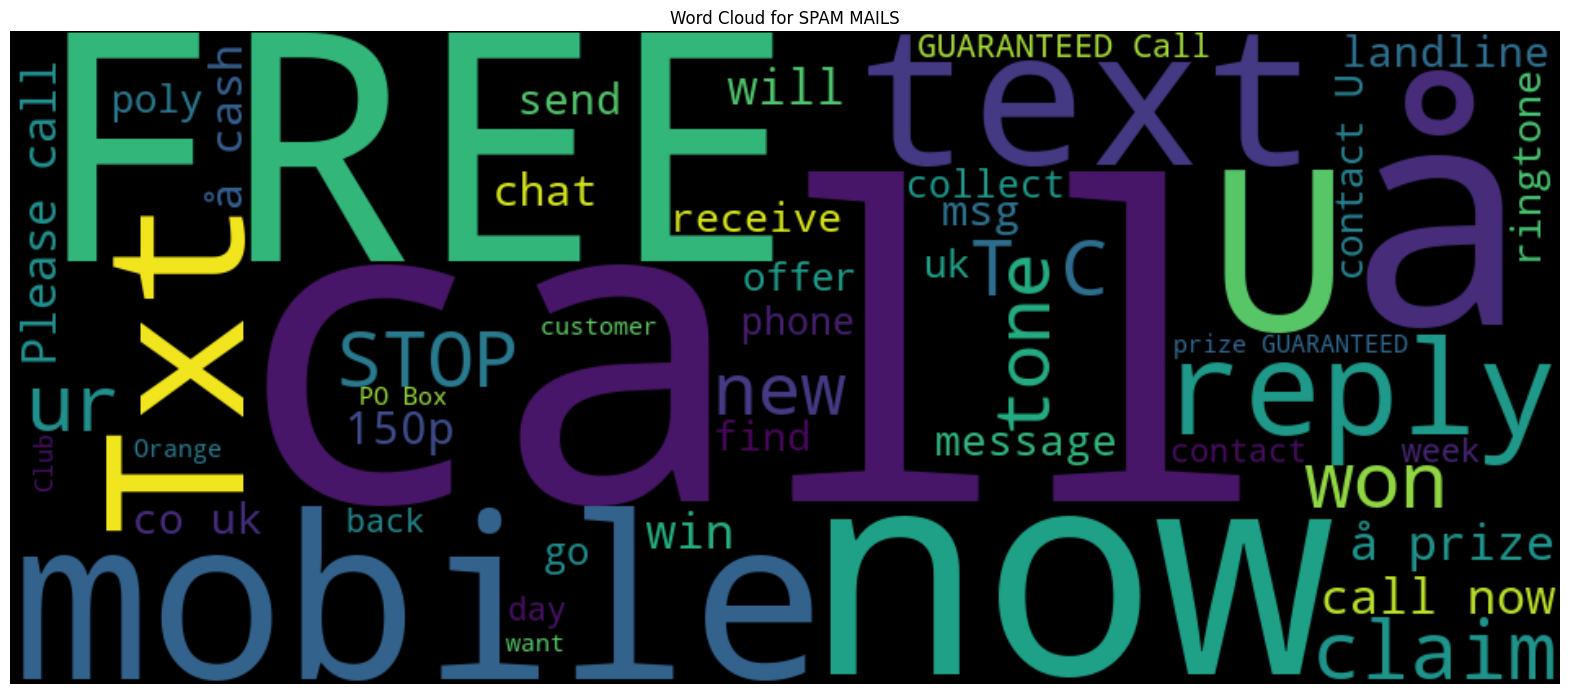

In [49]:
plt.figure(figsize=(20,10))
plt.title('Word Cloud for SPAM MAILS')
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')